In [1]:
import pandas as pd

gas = pd.read_excel('https://github.com/vacker92/record/blob/main/data/gas.xlsx?raw=true', sheet_name='gas')
gas_time = pd.read_excel('https://github.com/vacker92/record/blob/main/data/gas.xlsx?raw=true', sheet_name='gas_time')
gas_time_weather = pd.read_excel('https://github.com/vacker92/record/blob/main/data/gas.xlsx?raw=true', sheet_name='gas_time_weather')
train = pd.read_excel('https://github.com/vacker92/record/blob/main/data/gas.xlsx?raw=true', sheet_name='train')
test = pd.read_excel('https://github.com/vacker92/record/blob/main/data/gas.xlsx?raw=true', sheet_name='test')

#### 데이터 전처리 (컬럼명변겅, month, weekday 컬럼추가)

In [2]:
gas.columns = ['date', 'time', 'etc','supply']
gas_time.columns = ['date','time','supply']
gas_time_weather.columns = ['date','time','supply','weather']
train.columns = ['date','time','supply','weather']
test.columns = ['date','time','supply','weather']

In [3]:
gas_time['month'] = gas_time['date'].dt.month
gas_time['weekday'] = gas_time['date'].dt.weekday

gas_time_weather['month'] = gas_time_weather['date'].dt.month
gas_time_weather['weekday'] = gas_time_weather['date'].dt.weekday

train['month'] = train['date'].dt.month
train['weekday'] = train['date'].dt.weekday

test['month'] = test['date'].dt.month
test['weekday'] = test['date'].dt.weekday

#### 인덱스 시간 추가

In [4]:
gas_time['time']=gas_time['time'].apply(lambda x:'{:02d}'.format(x))
gas_time['time']=gas_time['time']=gas_time['time'].astype(str)
gas_time['time']=gas_time['time'].apply(lambda x:x+':00')
gas_time['time'].replace('24:00','00:00',inplace=True)
gas_time['time']=pd.to_datetime(gas_time['time'],format='%H:%M')
gas_time['time']=gas_time['time'].dt.time
gas_time['date']=gas_time['date'].astype(str)

gas_time_weather['time']=gas_time_weather['time'].apply(lambda x:'{:02d}'.format(x))
gas_time_weather['time']=gas_time_weather['time']=gas_time_weather['time'].astype(str)
gas_time_weather['time']=gas_time_weather['time'].apply(lambda x:x+':00')
gas_time_weather['time'].replace('24:00','00:00',inplace=True)
gas_time_weather['time']=pd.to_datetime(gas_time_weather['time'],format='%H:%M')
gas_time_weather['time']=gas_time_weather['time'].dt.time
gas_time_weather['date']=gas_time_weather['date'].astype(str)

train['time']=train['time'].apply(lambda x:'{:02d}'.format(x))
train['time']=train['time']=train['time'].astype(str)
train['time']=train['time'].apply(lambda x:x+':00')
train['time'].replace('24:00','00:00',inplace=True)
train['time']=pd.to_datetime(train['time'],format='%H:%M')
train['time']=train['time'].dt.time
train['date']=train['date'].astype(str)

test['time']=test['time'].apply(lambda x:'{:02d}'.format(x))
test['time']=test['time']=test['time'].astype(str)
test['time']=test['time'].apply(lambda x:x+':00')
test['time'].replace('24:00','00:00',inplace=True)
test['time']=pd.to_datetime(test['time'],format='%H:%M')
test['time']=test['time'].dt.time
test['date']=test['date'].astype(str)

In [5]:
cols=['date','time']
gas_time['date']=gas_time[cols].apply(lambda x: ' '.join(x.values.astype(str)), axis=1)
gas_time['date']=pd.to_datetime(gas_time['date'])
gas_time['time']=gas_time['time'].apply(lambda x:x.strftime('%H'))
gas_time['time']=gas_time['time'].str.replace('00','24')
gas_time['time']=gas_time['time'].astype('int64')

cols=['date','time']
gas_time_weather['date']=gas_time_weather[cols].apply(lambda x: ' '.join(x.values.astype(str)), axis=1)
gas_time_weather['date']=pd.to_datetime(gas_time_weather['date'])
gas_time_weather['time']=gas_time_weather['time'].apply(lambda x:x.strftime('%H'))
gas_time_weather['time']=gas_time_weather['time'].str.replace('00','24')
gas_time_weather['time']=gas_time_weather['time'].astype('int64')

cols=['date','time']
train['date']=train[cols].apply(lambda x: ' '.join(x.values.astype(str)), axis=1)
train['date']=pd.to_datetime(train['date'])
train['time']=train['time'].apply(lambda x:x.strftime('%H'))
train['time']=train['time'].str.replace('00','24')
train['time']=train['time'].astype('int64')

cols=['date','time']
test['date']=test[cols].apply(lambda x: ' '.join(x.values.astype(str)), axis=1)
test['date']=pd.to_datetime(test['date'])
test['time']=test['time'].apply(lambda x:x.strftime('%H'))
test['time']=test['time'].str.replace('00','24')
test['time']=test['time'].astype('int64')

#### 인덱스 요일,시간으로 설정

In [6]:
gas_time = gas_time.set_index('date')
gas_time_weather = gas_time_weather.set_index('date')
test = test.set_index('date')
train = train.set_index('date')

#### 원본데이터

<AxesSubplot:xlabel='etc', ylabel='supply'>

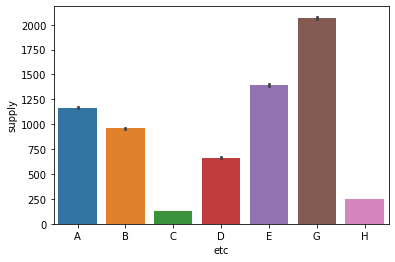

In [7]:
import seaborn as sns

sns.barplot(y='supply',
           x='etc',
           data = gas)

#### time 부분 분할 (A-H 평균값)

<AxesSubplot:xlabel='month', ylabel='supply'>

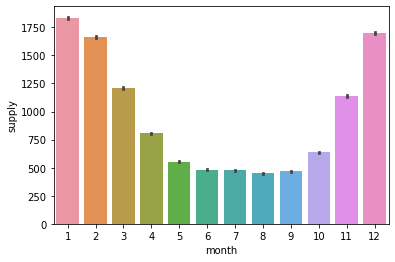

In [8]:
#gas_time = pd.DataFrame(gas.groupby(['date', 'time'])['supply'].mean())
sns.barplot(y='supply',
           x='month',
           data = gas_time)

#### gas_time 상관관계성

<AxesSubplot:>

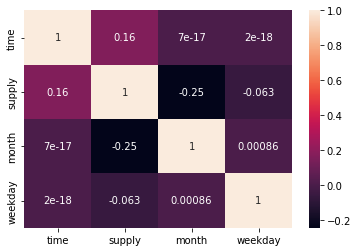

In [9]:
import seaborn as sns

time_corr = gas_time.corr
sns.heatmap(time_corr(), annot=True)

#### weather추가전 LinearRegression점수 

In [10]:
split = -8621

t_x_train = gas_time[0:split]
t_x_train = t_x_train.drop('supply',axis=True)
t_y_train = gas_time[0:split]
t_y_train = t_y_train['supply']

t_x_test = gas_time[split:]
t_x_test = t_x_test.drop('supply',axis=True)
t_y_test = gas_time[split:]
t_y_test = t_y_test['supply']

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

time_lr = LinearRegression()
time_lr.fit(t_x_train, t_y_train)
time_pred = time_lr.predict(t_x_test)
time_score = metrics.r2_score(t_y_test, time_pred)
print('온도 추가전 정확도 {:.5f}'.format(time_score))

온도 추가전 정확도 0.07373


#### weather 추가

In [12]:
#w2013 = pd.read_csv("2013.csv", encoding='cp949', parse_dates=['일시'],usecols=[1,2])
#w2014 = pd.read_csv("2014.csv", encoding='cp949', parse_dates=['일시'],usecols=[1,2])
#w2015 = pd.read_csv("2015.csv", encoding='cp949', parse_dates=['일시'],usecols=[1,2])
#w2016 = pd.read_csv("2016.csv", encoding='cp949', parse_dates=['일시'],usecols=[1,2])
#w2017 = pd.read_csv("2017.csv", encoding='cp949', parse_dates=['일시'],usecols=[1,2])
#w2018 = pd.read_csv("2018.csv", encoding='cp949', parse_dates=['일시'],usecols=[1,2])
# 데이터 합치기
#weather = pd.concat([w2013, w2014, w2015, w2016, w2017, w2018])
#weather = weather.reset_index(drop=True)

#weather.to_csv('weather.csv',header=False,index=False)

<AxesSubplot:>

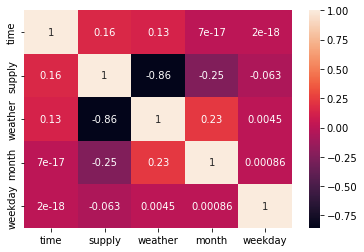

In [13]:
weather_corr = gas_time_weather.corr
sns.heatmap(weather_corr(), annot=True)

#### Nan값확인 및 제거

In [14]:
train.isnull().sum()
test.isnull().sum()
train = train.dropna()
test = test.dropna()

#### train, test 분할

In [15]:
x_train = train.drop(['supply'], axis=1)
x_test = test.drop(['supply'], axis=1)
y_train = train['supply']
y_test = test['supply']

#### 온도추가후 LinearRegression 기반 예측분석 

In [16]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_score = metrics.r2_score(y_test, lr_pred)
print('온도 추가후 정확도 {:.5f}'.format(lr_score))

온도 추가후 정확도 0.79393


In [17]:
print('온도 추가전 정확도 {:.5f}'.format(time_score))
print('온도 추가후 정확도 {:.5f}'.format(lr_score))

온도 추가전 정확도 0.07373
온도 추가후 정확도 0.79393


#### 여러모델들 적용
 1. RandomForestRegressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

param_grid = {'n_estimators':[10,100,500], 'max_features': [ "sqrt", "log2", "auto"],
             'max_depth': [10, 15, 20, 25]}

rf = RandomForestRegressor()
rf_grid = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

rf_grid.fit(x_train,y_train)
print(rf_grid.best_params_)
print('randomforest train score: {:.5f}'.format(rf_grid.best_score_))
rf_pred = rf_grid.predict(x_test)
print('randomforest test sore: {:.5f}'.format(r2_score(y_test,rf_pred)))
print('mae {:.5f}'.format(mean_absolute_error(y_test, rf_pred)))

{'max_depth': 15, 'max_features': 'log2', 'n_estimators': 500}
randomforest train score: 0.96940
randomforest test sore: 0.96473
mae 84.08467


2. LGBM

In [19]:
from lightgbm import LGBMRegressor
lgb=LGBMRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)
lgb.fit(x_train,y_train)

print('lgb train score {:.5f}'.format(lgb.score(x_train, y_train)))
lgb_pred=lgb.predict(x_test)
print('lgb test score {:.5f}'.format(r2_score(y_test,lgb_pred)))
print('mae {:.5f}'.format(mean_absolute_error(y_test, lgb_pred)))

lgb train score 0.97802
lgb test score 0.96663
mae 82.43897


3. KNeighborsRegressor (KNN)

In [20]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(n_neighbors = 5, weights = "distance")
kn.fit(x_train,y_train)

print('knn train score {:.5f}'.format(kn.score(x_train, y_train)))
kn_pred=kn.predict(x_test)
print('knn test score {:.5f}'.format(r2_score(y_test,kn_pred)))
print('mae {:.5f}'.format(mean_absolute_error(y_test, kn_pred)))

knn train score 0.99846
knn test score 0.95976
mae 88.66103


#### VotingRegressor 투표결과

In [21]:
from sklearn.ensemble import VotingRegressor

voting=VotingRegressor(estimators=[ ('rf',rf),
                                    ('lgb',lgb),
                                    ('kn',kn)], n_jobs=-1)

voting.fit(x_train,y_train)
voting_pred=voting.predict(x_test)

for clf in [rf,lgb,kn]:
    clf.fit(x_train, y_train)
    s=clf.score(x_test, y_test) 
    n=clf.__class__.__name__
    print(n,'test score : {:.5f}'.format(s))

print('최적의 모델 : LGMBRegressor')
print('보팅 회귀모델의 score : {:.5f}'.format(r2_score(y_test, voting_pred)))

RandomForestRegressor test score : 0.96288
LGBMRegressor test score : 0.96663
KNeighborsRegressor test score : 0.95976
최적의 모델 : LGMBRegressor
보팅 회귀모델의 score : 0.96572


#### 선형회귀 tensorflow기반 예측모델

In [22]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

ss = StandardScaler()
d_x_train = ss.fit_transform(x_train)
d_x_test = ss.fit_transform(x_test)

In [23]:
model = Sequential()
model.add(Dense(120, input_dim=4, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(d_x_train, y_train, validation_data=(d_x_test, y_test), epochs=100, batch_size=10, verbose=0)

In [24]:
y_prediction = model.predict(d_x_test).flatten()
for i in range(10):
    label = y_test[i]
    prediction = y_prediction[i]
    print("실제공급량: {:.3f}, 예상공급량: {:.3f}".format(label, prediction))

print('Sequential score {:.5f}'.format(r2_score(y_test,y_prediction)))  

실제공급량: 1470.313, 예상공급량: 1491.237
실제공급량: 1396.057, 예상공급량: 1310.862
실제공급량: 1337.100, 예상공급량: 1197.809
실제공급량: 1325.318, 예상공급량: 1220.894
실제공급량: 1398.112, 예상공급량: 1347.924
실제공급량: 1424.857, 예상공급량: 1518.717
실제공급량: 1487.871, 예상공급량: 1801.245
실제공급량: 1634.397, 예상공급량: 2149.733
실제공급량: 1816.253, 예상공급량: 2237.424
실제공급량: 1852.121, 예상공급량: 2121.228
Sequential score 0.94825


In [25]:
gas_time_weather = gas_time_weather.dropna()

In [26]:
gas_time_weather.isnull().sum()

time       0
supply     0
weather    0
month      0
weekday    0
dtype: int64

#### LSTM을 이용한 예측
1. 스케일링 전 이상치 확인

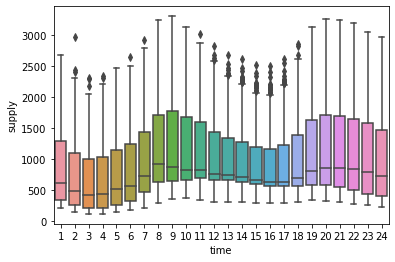

In [27]:
bplot= sns.boxplot(y='supply', 
                   x='time',
                   data=gas_time_weather)

2. 이상치제거

In [28]:
quartile_1 = gas_time_weather.quantile(0.25)
quartile_3 = gas_time_weather.quantile(0.75)
IQR = quartile_3 - quartile_1
condition = (gas_time_weather < (quartile_1 - 1.5 * IQR)) | (gas_time_weather > (quartile_3 + 1.5 * IQR))
condition = condition.any(axis=1)
condition = ~ condition
gas_time_weather = gas_time_weather[condition]

3. 이상치 재확인

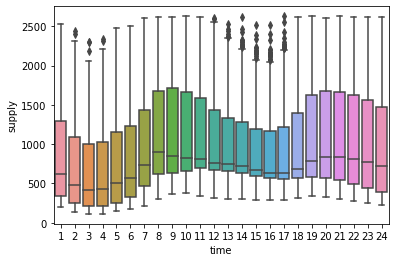

In [29]:
bplot= sns.boxplot(y='supply', 
                   x='time',
                   data=gas_time_weather)

4. 표준정규화

In [30]:
scaler = StandardScaler()
scale_cols = ['time', 'supply', 'weather', 'month', 'weekday']
scaled_df = scaler.fit_transform(gas_time_weather[scale_cols])
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)
scaled_df.index = gas_time_weather.index

5.입력데이터 feature_cols, 정답데이터 label_cols 생성

In [31]:
feature_cols = ['time',  'weather', 'month', 'weekday']
label_cols = ['supply']
label_df = pd.DataFrame(scaled_df, columns=label_cols)
feature_df = pd.DataFrame(scaled_df, columns=feature_cols)
label_np = label_df.to_numpy()
feature_np = feature_df.to_numpy()

6. 입력파라미터 feature, label -> numpy type make_sequene_dataset 함수 생성

In [32]:
def make_sequene_dataset (feature, label, window_size) :
    feature_list = []
    label_list = []
    
    for i in range(len(feature)-window_size):
        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])
        
    return np.array(feature_list), np.array(label_list)

7.입력데이터x, 정답데이터y 생성  
리턴되는 입력데이터(x.shape)는 batch size, time steps, input dims를 가지고 있는 3차원

In [33]:
import numpy as np

window_size = 40

x,y = make_sequene_dataset(feature_np, label_np, window_size)
print(x.shape, y.shape)

(52259, 40, 4) (52259, 1)


8. test, train 분할

In [34]:
split = -8621

lstm_x_train = x[0:split]
lstm_y_train = y[0:split]

lstm_x_test = x[split:]
lstm_y_test = y[split:]

print(lstm_x_train.shape, lstm_y_train.shape)
print(lstm_x_test.shape, lstm_y_test.shape)

(43638, 40, 4) (43638, 1)
(8621, 40, 4) (8621, 1)


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

9. 256개의 노드를 가지는 lstm레이어와 1개의 노드를 가지는 출력층으로 구성

In [36]:
lstm_model = Sequential()

lstm_model.add(LSTM(256,
              activation='tanh',
              input_shape=lstm_x_train[0].shape))
lstm_model.add(Dense(1, activation='linear'))
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               267264    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 267,521
Trainable params: 267,521
Non-trainable params: 0
_________________________________________________________________


10.손실함수 loss=mse , 옵티마이저는 adam, 관찰대상인 metric은 오차의 절대값을 나타내는 mae 로 설정

In [37]:
lstm_model.compile(loss='mse', optimizer='adam', metrics=['mae'])
early_stop = EarlyStopping(monitor = 'val_loss', patience=5)

lstm_model.fit(lstm_x_train, lstm_y_train, 
          validation_data=(lstm_x_test, lstm_y_test), epochs=100, batch_size=20, callbacks=[early_stop])

Epoch 1/100
2182/2182 [==============================] - 14s 5ms/step - loss: 0.0384 - mae: 0.1349 - val_loss: 0.0377 - val_mae: 0.1396
Epoch 2/100
2182/2182 [==============================] - 11s 5ms/step - loss: 0.0227 - mae: 0.1049 - val_loss: 0.0289 - val_mae: 0.1263
Epoch 3/100
2182/2182 [==============================] - 11s 5ms/step - loss: 0.0199 - mae: 0.0977 - val_loss: 0.0296 - val_mae: 0.1344
Epoch 4/100
2182/2182 [==============================] - 11s 5ms/step - loss: 0.0177 - mae: 0.0916 - val_loss: 0.0243 - val_mae: 0.1145
Epoch 5/100
2182/2182 [==============================] - 11s 5ms/step - loss: 0.0164 - mae: 0.0883 - val_loss: 0.0317 - val_mae: 0.1410
Epoch 6/100
2182/2182 [==============================] - 11s 5ms/step - loss: 0.0155 - mae: 0.0855 - val_loss: 0.0277 - val_mae: 0.1221
Epoch 7/100
2182/2182 [==============================] - 11s 5ms/step - loss: 0.0149 - mae: 0.0834 - val_loss: 0.0259 - val_mae: 0.1174
Epoch 8/100
2182/2182 [=========================

In [38]:
lstm_pred = lstm_model.predict(lstm_x_test)
print('lstm test score {:.5f}'.format(r2_score(lstm_pred, lstm_y_test)))

lstm test score 0.97103


In [39]:
print('lstm mae {:.5f}'.format(mean_absolute_error(lstm_pred, lstm_y_test)))

lstm mae 0.12744


In [40]:
from sklearn.metrics import mean_squared_error

print('lstm mse {:.5f}'.format(mean_squared_error(lstm_pred, lstm_y_test)))

lstm mse 0.02790


In [41]:
print('온도 추가전 LinearRegression {:.5f}'.format(time_score))
print('온도 추가후 LinearRegression {:.5f}'.format(lr_score))
print('tenserfolw  LinearRegression {:.5f}'.format(r2_score(y_test,y_prediction)))

온도 추가전 LinearRegression 0.07373
온도 추가후 LinearRegression 0.79393
tenserfolw  LinearRegression 0.94825
